In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plty
import numpy as np
import matplotlib.dates as mdates

In [2]:
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["figure.figsize"] = [16*1.1,8*1.1] # tamanho do gráfico em "cm"
EstiloLinha = ['-','--','-.','.','-','--','-.','.','-','--','-.','.','-','--','-.','.']

In [3]:
COVIDBR = pd.read_csv('HIST_PAINEL_COVIDBR_16mar2021.zip',sep = ';') # Painel COVID baixado offline e zipado (~30Mb)
# blob:https://covid.saude.gov.br/69e938ff-31aa-43f1-bc1f-d2639b417789 --> o CSV é baixado daqui
# https://covid.saude.gov.br/

In [4]:
COVIDBR['DpM'] = 1000000*COVIDBR.obitosAcumulado/COVIDBR.populacaoTCU2019 # calcular o DpM pela população local
COVIDBR['DDpM'] = 1000000*COVIDBR.obitosNovos/COVIDBR.populacaoTCU2019 # calcular o DDpM baseado na colunas de obitos novos
COVIDBR['CpM'] = 1000000*COVIDBR.casosAcumulado/COVIDBR.populacaoTCU2019 # calcular o CpM pela população local
COVIDBR['DCpM'] = 1000000*COVIDBR.casosNovos/COVIDBR.populacaoTCU2019 # calcular o DCpM baseado na colunas de obitos novos

In [6]:
# pivotar COVIDBR por município e óbitos cumulativos
COVIDBR_Deaths = pd.pivot_table(COVIDBR[['data','codmun','obitosAcumulado']], values='obitosAcumulado', index=['data'],columns=['codmun']) #, aggfunc=np.sum
COVIDBR_Cases = pd.pivot_table(COVIDBR[['data','codmun','casosAcumulado']], values='casosAcumulado', index=['data'],columns=['codmun']) #, aggfunc=np.sum
COVIDBR_DpM = pd.pivot_table(COVIDBR[['data','codmun','DpM']], values='DpM', index=['data'],columns=['codmun']) #, aggfunc=np.sum
COVIDBR_CpM = pd.pivot_table(COVIDBR[['data','codmun','CpM']], values='CpM', index=['data'],columns=['codmun']) #, aggfunc=np.sum
# colunas de codmun, index de datas, valores de Deaths, Cases, DpM, e CpM
# agora, temos 5570 municípios, um em cada coluna, com estes valores

In [63]:
IBGE_DB_AC = pd.read_excel('IBGE/AC.xlsx',header=2)
IBGE_DB_AL = pd.read_excel('IBGE/AL.xlsx',header=2)
IBGE_DB_AM = pd.read_excel('IBGE/AM.xlsx',header=2)
IBGE_DB_AP = pd.read_excel('IBGE/AP.xlsx',header=2)
IBGE_DB_BA = pd.read_excel('IBGE/BA.xlsx',header=2)
IBGE_DB_CE = pd.read_excel('IBGE/CE.xlsx',header=2)
IBGE_DB_DF = pd.read_excel('IBGE/DF.xlsx',header=2)
IBGE_DB_ES = pd.read_excel('IBGE/ES.xlsx',header=2)
IBGE_DB_GO = pd.read_excel('IBGE/GO.xlsx',header=2)
IBGE_DB_MA = pd.read_excel('IBGE/MA.xlsx',header=2)
IBGE_DB_MG = pd.read_excel('IBGE/MG.xlsx',header=2)
IBGE_DB_MS = pd.read_excel('IBGE/MS.xlsx',header=2)
IBGE_DB_MT = pd.read_excel('IBGE/MT.xlsx',header=2)
IBGE_DB_PA = pd.read_excel('IBGE/PA.xlsx',header=2)
IBGE_DB_PB = pd.read_excel('IBGE/PB.xlsx',header=2)
IBGE_DB_PE = pd.read_excel('IBGE/PE.xlsx',header=2)
IBGE_DB_PI = pd.read_excel('IBGE/PI.xlsx',header=2)
IBGE_DB_PR = pd.read_excel('IBGE/PR.xlsx',header=2)
IBGE_DB_RJ = pd.read_excel('IBGE/RJ.xlsx',header=2)
IBGE_DB_RN = pd.read_excel('IBGE/RN.xlsx',header=2)
IBGE_DB_RO = pd.read_excel('IBGE/RO.xlsx',header=2)
IBGE_DB_RR = pd.read_excel('IBGE/RR.xlsx',header=2)
IBGE_DB_RS = pd.read_excel('IBGE/RS.xlsx',header=2)
IBGE_DB_SC = pd.read_excel('IBGE/SC.xlsx',header=2)
IBGE_DB_SE = pd.read_excel('IBGE/SE.xlsx',header=2)
IBGE_DB_SP = pd.read_excel('IBGE/SP.xlsx',header=2)
IBGE_DB_TO = pd.read_excel('IBGE/TO.xlsx',header=2)

,Município [-],Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2020],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2017],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2018]
0,Acrelândia,1200013.0,acrelandense,OLAVO FRANCELINO DE REZENDE,1811.613,15490.0,6.94,95.1,0.604,11.72,25276.53010,27229.75864,15737.64
1,Assis Brasil,1200054.0,assis-brasiliense,JERRY CORREIA MARINHO,4979.073,7534.0,1.22,85.1,0.588,8.06,18177.08341,17004.90982,12532.31
2,Brasiléia,1200104.0,brasileense,FERNANDA DE SOUZA HASSEM CESAR,3928.174,26702.0,5.46,90.2,0.614,17.54,53414.58452,43280.57780,16165.25
3,Bujari,1200138.0,bujariense,JOÃO EDVALDO TELES DE LIMA,3034.869,10420.0,2.79,91.1,0.589,6.51,21293.77410,16796.61014,15606.47
4,Capixaba,1200179.0,capixabense,MANOEL MAIA BEZERRA,1705.824,12008.0,5.17,92.6,0.575,16.46,22177.70636,18125.24714,14874.52
5,Cruzeiro do Sul,1200203.0,cruzeirense,JOSÉ DE SOUZA LIMA,8783.470,89072.0,8.94,94.9,0.664,11.28,139636.40815,131394.84682,16261.39
6,Epitaciolândia,1200252.0,epitaciolandense,SERGIO LOPES DE SOUZA,1652.674,18696.0,9.13,93.7,0.653,10.31,31996.17426,28161.83244,25349.75
7,Feijó,1200302.0,feijoense,KIEFER ROBERTO CAVALCANTE LIMA,27976.874,34884.0,1.16,82.9,0.539,15.61,52016.77509,44915.33544,10500.72
8,Jordão,1200328.0,jordãoense,FRANCISCO NAUDINO RIBEIRO SOUZA,5357.227,8473.0,1.23,71.3,0.469,22.56,26243.12810,22373.45700,9428.70
9,Mâncio Lima,1200336.0,mancio-limense,ISAAC DE SOUZA LIMA,5451.617,19311.0,2.79,94.9,0.625,8.38,40273.43998,33192.43845,10629.45


In [66]:
IBGE_DB_AC['UF'] ='AC'
IBGE_DB_AL['UF'] ='AL'
IBGE_DB_AM['UF'] ='AM'
IBGE_DB_AP['UF'] ='AP'
IBGE_DB_BA['UF'] ='BA'
IBGE_DB_CE['UF'] ='CE'
IBGE_DB_DF['UF'] ='DF'
IBGE_DB_ES['UF'] ='ES'
IBGE_DB_GO['UF'] ='GO'
IBGE_DB_MA['UF'] ='MA'
IBGE_DB_MG['UF'] ='MG'
IBGE_DB_MS['UF'] ='MS'
IBGE_DB_MT['UF'] ='MT'
IBGE_DB_PA['UF'] ='PA'
IBGE_DB_PB['UF'] ='PB'
IBGE_DB_PE['UF'] ='PE'
IBGE_DB_PI['UF'] ='PI'
IBGE_DB_PR['UF'] ='PR'
IBGE_DB_RJ['UF'] ='RJ'
IBGE_DB_RN['UF'] ='RN'
IBGE_DB_RO['UF'] ='RO'
IBGE_DB_RR['UF'] ='RR'
IBGE_DB_RS['UF'] ='RS'
IBGE_DB_SC['UF'] ='SC'
IBGE_DB_SE['UF'] ='SE'
IBGE_DB_SP['UF'] ='SP'
IBGE_DB_TO['UF'] ='TO'
IBGE_DB = pd.concat([IBGE_DB_AC,IBGE_DB_AL,IBGE_DB_AM,IBGE_DB_AP,IBGE_DB_BA,IBGE_DB_CE,IBGE_DB_DF,IBGE_DB_ES,IBGE_DB_GO,IBGE_DB_MA,IBGE_DB_MG,IBGE_DB_MS,IBGE_DB_MT,IBGE_DB_PA,IBGE_DB_PB,IBGE_DB_PE,IBGE_DB_PI,IBGE_DB_PR,IBGE_DB_RJ,IBGE_DB_RN,IBGE_DB_RO,IBGE_DB_RR,IBGE_DB_RS,IBGE_DB_SC,IBGE_DB_SE,IBGE_DB_SP,IBGE_DB_TO])
# https://www.ibge.gov.br/cidades-e-estados/rs/porto-alegre.html baixado offline e zipado (~30Mb)
# baixei cada estado, não tem atalho direto para os csv atualizados, mas só preciso do valor atual mesmo

,Município [-],Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2020],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2017],...,Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2018],UF,Prefeito [2017],Receitas realizadas - R$ (×1000) [2014],Despesas empenhadas - R$ (×1000) [2014],Mortalidade infantil - óbitos por mil nascidos vivos [2013],Mortalidade infantil - óbitos por mil nascidos vivos [2016],Mortalidade infantil - óbitos por mil nascidos vivos [2015],Mortalidade infantil - óbitos por mil nascidos vivos [2014]
0,Abadia dos Dourados,3100104.0,abadiense,WANDERLEI LEMES SANTOS,880.461,7006.0,7.61,98.3,0.689,NaN,...,18793.5,18353.48,MG,NaN,NaN,NaN,16.95,NaN,NaN,NaN
1,Abaeté,3100203.0,abaetense,IVANIR DELADIER DA COSTA,1817.067,23250.0,12.49,99.8,0.698,NaN,...,40774.2,21286.43,MG,NaN,NaN,NaN,12.3,NaN,NaN,NaN
2,Abre Campo,3100302.0,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13444.0,28.29,97.4,0.654,NaN,...,29577.6,13938.86,MG,NaN,NaN,NaN,27.03,NaN,NaN,NaN
3,Acaiaca,3100401.0,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3994.0,38.47,96,0.63,NaN,...,12445.3,11080.84,MG,NaN,NaN,NaN,42.55,NaN,NaN,NaN
4,Açucena,3100500.0,açucenense,RAULISSON MORAIS,815.422,9368.0,12.6,96.7,0.61,NaN,...,19513.4,10540.16,MG,NaN,NaN,NaN,26.09,NaN,NaN,NaN


In [102]:
# 2021.03.18.19.14
# agora, tenho que cruzar os dados de DDpM com os de densidade demográfica
# limpar IBGE por município e densidade
IBGE_ro = IBGE_DB.iloc[:,[0,1,4,5,6]]
IBGE_ro['ro2020'] = IBGE_ro.iloc[:,3]/IBGE_ro.iloc[:,2]
IBGE_ro.columns = ['MUN','codmun','AREA','POP2020','ro2010','ro2020']
IBGE_ro.head()

<ipython-input-102-d933c36ea5ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBGE_ro['ro2020'] = IBGE_ro.iloc[:,3]/IBGE_ro.iloc[:,2]


,MUN,codmun,AREA,POP2020,ro2010,ro2020
0,Acrelândia,1200013.0,1811.613,15490.0,6.94,8.550391
1,Assis Brasil,1200054.0,4979.073,7534.0,1.22,1.513133
2,Brasiléia,1200104.0,3928.174,26702.0,5.46,6.797560
3,Bujari,1200138.0,3034.869,10420.0,2.79,3.433427
4,Capixaba,1200179.0,1705.824,12008.0,5.17,7.039413


In [103]:
IBGE_ro.index = IBGE_ro.codmun.T
IBGE_ro

,MUN,codmun,AREA,POP2020,ro2010,ro2020
codmun,,,,,,
1200013.0,Acrelândia,1200013.0,1811.613,15490.0,6.94,8.550391
1200054.0,Assis Brasil,1200054.0,4979.073,7534.0,1.22,1.513133
1200104.0,Brasiléia,1200104.0,3928.174,26702.0,5.46,6.797560
1200138.0,Bujari,1200138.0,3034.869,10420.0,2.79,3.433427
1200179.0,Capixaba,1200179.0,1705.824,12008.0,5.17,7.039413
...,...,...,...,...,...,...
NaN,IDHM Índice de desenvolvimento humano municipa...,NaN,NaN,NaN,NaN,NaN
NaN,"Mortalidade infantil: Ministério da Saúde, Dep...",NaN,NaN,NaN,NaN,NaN
NaN,Receitas realizadas: Contas anuais. Receitas o...,NaN,NaN,NaN,NaN,NaN


In [110]:
other = COVIDBR_Deaths.tail(1).T
other.index

Float64Index([110000.0, 110001.0, 110002.0, 110003.0, 110004.0, 110005.0,
              110006.0, 110007.0, 110008.0, 110009.0,
              ...
              522160.0, 522170.0, 522180.0, 522185.0, 522190.0, 522200.0,
              522205.0, 522220.0, 522230.0, 530010.0],
             dtype='float64', name='codmun', length=5591)

In [108]:
IBGE_ro_2 = IBGE_ro.join(other)#,left_index=True)#, left_on='index', right_on='index')
IBGE_ro_2.head(30)

,MUN,codmun,AREA,POP2020,ro2010,ro2020,2021-03-16
codmun,,,,,,,
1100015.0,Alta Floresta D'Oeste,1100015.0,7067.127,22728.0,3.45,3.216017,NaN
1100023.0,Ariquemes,1100023.0,4426.571,109523.0,20.41,24.742176,NaN
1100031.0,Cabixi,1100031.0,1314.352,5188.0,4.8,3.947192,NaN
1100049.0,Cacoal,1100049.0,3793.000,85893.0,20.72,22.645136,NaN
1100056.0,Cerejeiras,1100056.0,2783.300,16204.0,6.12,5.821866,NaN
1100064.0,Colorado do Oeste,1100064.0,1451.060,15544.0,12.81,10.712169,NaN
1100072.0,Corumbiara,1100072.0,3060.321,7220.0,2.87,2.359230,NaN
1100080.0,Costa Marques,1100080.0,4987.177,18798.0,2.74,3.769267,NaN
1100098.0,Espigão D'Oeste,1100098.0,4518.038,32695.0,6.36,7.236548,NaN


In [70]:
plty.scatter(IBGE_ro.ro2020,DpM.tail(1)[List_ALL_Ctry_GDP])
plty.ylabel('Deaths per Million')
plty.xlabel('Country GDP (U$2010)')
plty.title('Deaths per Million compared to Country GDP (no extremes) (Correlation='+str(Dpm_GDP2017_Correlation)+')')
plty.ylim(0,1.2) # tirando o extremo de 1.6
plty.xlim(0,1000000000000) # tirando os GDP extremos para melhor visualização
# plty.legend(Delta_DpM_top_clean.columns,title = 'Country',loc='upper center', ncol=3)
plty.grid()

Município [-]                              Acrelândia
Código [-]                                1.20001e+06
Área Territorial - km² [2020]                 1811.61
População estimada - pessoas [2020]             15490
Densidade demográfica - hab/km² [2010]           6.94
Name: 0, dtype: object

In [6]:
# Achar os N municípios com mais mortes, mais Cases, mais DpM, mais CpM
N = 10
TopNMunicipDeaths = COVIDBR_Deaths_pvt.tail(1).max().nlargest(n=N, keep='first')
TopNMunicipCases = COVIDBR_Cases_pvt.tail(1).max().nlargest(n=N, keep='first')
TopNMunicipDpM = COVIDBR_DpM_pvt.tail(1).max().nlargest(n=N, keep='first')
TopNMunicipCpM = COVIDBR_CpM_pvt.tail(1).max().nlargest(n=N, keep='first')
# gera DF em que o index é dos códigos dos N municípios com mais mortes

In [7]:
# incluir os dados de SJC para os Top de interesse
SJC = pd.Series([COVIDBR[COVIDBR.codmun==354990.0].obitosAcumulado.max()],index=[354990.0])
TopNMunicipDeaths = TopNMunicipDeaths.append(SJC)
SJC = pd.Series([COVIDBR[COVIDBR.codmun==354990.0].casosAcumulado.max()],index=[354990.0])
TopNMunicipCases = TopNMunicipCases.append(SJC)
SJC = pd.Series([COVIDBR[COVIDBR.codmun==354990.0].DpM.max()],index=[354990.0])
TopNMunicipDpM = TopNMunicipDpM.append(SJC)
SJC = pd.Series([COVIDBR[COVIDBR.codmun==354990.0].CpM.max()],index=[354990.0])
TopNMunicipCpM = TopNMunicipCpM.append(SJC)

In [8]:
# este é para carregar o painel GLOBAL
#MobilityCOVID = pd.read_csv('20210317_Global_Mobility_Report.zip',sep=',',dtype={'metro_area': object,'iso_3166_2_code': object}) #?????
#MobilityCOVID = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv',sep=',',dtype={'metro_area': object,'iso_3166_2_code': object}) #?????
# este é para carregar o painel BRASIL
MobilityCOVID = pd.read_csv('20210317_BR_Region_Mobility_Report.zip',sep=',',dtype={'metro_area': object,'iso_3166_2_code': object}) #????? Painel Google Mobility de 21JAN
# https://www.google.com/covid19/mobility/

In [9]:
MobilityCOVID.columns = ['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2','metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'Shopping', 'Markets', 'Parks','Stations','Workplaces','Residential']

In [10]:
MobilityCOVID.Shopping = (MobilityCOVID.Shopping+100)/100 # usando dados unitários 
MobilityCOVID.Markets = (MobilityCOVID.Markets+100)/100 # usando dados unitários 
MobilityCOVID.Parks = (MobilityCOVID.Parks+100)/100 # usando dados unitários 
MobilityCOVID.Stations = (MobilityCOVID.Stations+100)/100 # usando dados unitários 
MobilityCOVID.Workplaces = (MobilityCOVID.Workplaces+100)/100 # usando dados unitários 
MobilityCOVID.Residential = (MobilityCOVID.Residential+100)/100 # usando dados unitários  
MobilityCOVID['MobilityIndex'] = MobilityCOVID.Shopping*MobilityCOVID.Markets*MobilityCOVID.Parks*MobilityCOVID.Stations*MobilityCOVID.Workplaces*MobilityCOVID.Residential
#MobilityIndex é um índice inventado para combinar todos os descritos no BD

In [11]:
TopNDeathsMunicipNames = COVIDBR[COVIDBR['codmun'].isin(TopNMunicipDeaths.index)].municipio.unique()
TopNDeathsMunicipNames = np.append(TopNDeathsMunicipNames,'Macae') # correção par ao nome de SJC
MobilityCOVID_TopNBR = MobilityCOVID[MobilityCOVID['sub_region_2'].isin(TopNDeathsMunicipNames)] 
# aqui, ficam filtrados os mesmos municípios dos Top N de mortes
# é uma seleção do MobilityCOVID total, somente com as linhas dos municípios de interesse
TopNDeathsMunicipNames

array(['Manaus', 'Belém', 'Fortaleza', 'Recife', 'Salvador',
       'Belo Horizonte', 'Rio de Janeiro', 'São José dos Campos',
       'São Paulo', 'Goiânia', 'Brasília', 'Macae'], dtype=object)

In [12]:
MobilityCOVID_TopNBR_pvt = MobilityCOVID_TopNBR[['date','sub_region_2','MobilityIndex']].pivot(index='date', columns='sub_region_2', values='MobilityIndex')
#Pivoteia para listar os Top N Municipios e seus Mobility Index

In [13]:
CityCOVIDBR_chosen = ['Fortaleza','Manaus','Belém','Rio de Janeiro','São Paulo','São José dos Campos','Macaé']
CityMOBI_chosen = ['Fortaleza','Manaus','Belém','Rio de Janeiro','São Paulo','Sao Jose dos Campos','Macaé'] # gera dados para uma cidade específica e usa CityMOBI (Só para mobilidade)
codmun_chosen = [230440.0,130260.0,150140.0,330455.0,355030.0,354990.0,330240.0]

In [14]:
NCity = 6
# daqui para frente, trabalhamos com a cidade indicada nas VAR abaixo
CityCOVIDBR = CityCOVIDBR_chosen[NCity] # tem que ter uma City para cada BD, pois usam nomes de cidades com e sem acento
CityMOBI = CityMOBI_chosen[NCity] # gera dados para uma cidade específica e usa CityMOBI (Só para mobilidade)
Filter_City = COVIDBR.codmun==codmun_chosen[NCity]
# outros exemplos
# NomeCOVID CodCOVID NomeMobility
# Belém 150140.0 Belém
# Manaus 130260.0 Manaus
# São José dos Campos 354990.0 Sao Jose dos Campos
# Rio de Janeiro 330455.0 Rio de Janeiro
# São Paulo 355030.0 São Paulo
# Fortaleza 230440.0
# Macaé 330240.0

In [15]:
# monta a tabela exclusiva da cidade indicada
COVIDBR_City = COVIDBR[Filter_City]
COVIDBR_City_DDpM_pvt = COVIDBR_City[['data','municipio','DDpM']].pivot(index='data', columns='municipio', values='DDpM')
COVIDBR_City_DCpM_pvt = COVIDBR_City[['data','municipio','DCpM']].pivot(index='data', columns='municipio', values='DCpM')
COVIDBR_City_DpM_pvt = COVIDBR_City[['data','municipio','DpM']].pivot(index='data', columns='municipio', values='DpM')
COVIDBR_City_CpM_pvt = COVIDBR_City[['data','municipio','CpM']].pivot(index='data', columns='municipio', values='CpM')

In [16]:
MobilityCOVID_City = MobilityCOVID[MobilityCOVID['sub_region_2']==CityMOBI] 

MobilityCOVID_City_Shopping_pvt = MobilityCOVID_City[['date','sub_region_2','Shopping']].pivot(index='date', columns='sub_region_2', values='Shopping')
MobilityCOVID_City_Markets_pvt = MobilityCOVID_City[['date','sub_region_2','Markets']].pivot(index='date', columns='sub_region_2', values='Markets')
MobilityCOVID_City_Workplaces_pvt = MobilityCOVID_City[['date','sub_region_2','Workplaces']].pivot(index='date', columns='sub_region_2', values='Workplaces')
MobilityCOVID_City_Parks_pvt = MobilityCOVID_City[['date','sub_region_2','Parks']].pivot(index='date', columns='sub_region_2', values='Parks')
MobilityCOVID_City_Stations_pvt = MobilityCOVID_City[['date','sub_region_2','Stations']].pivot(index='date', columns='sub_region_2', values='Stations')
MobilityCOVID_City_Residential_pvt = MobilityCOVID_City[['date','sub_region_2','Residential']].pivot(index='date', columns='sub_region_2', values='Residential')
MobilityCOVID_City_MobIndex_pvt = MobilityCOVID_City[['date','sub_region_2','MobilityIndex']].pivot(index='date', columns='sub_region_2', values='MobilityIndex')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_Shopping_pvt.join(MobilityCOVID_City_Markets_pvt, lsuffix='_Shopp', rsuffix='_Mkts')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(MobilityCOVID_City_Workplaces_pvt, lsuffix='_Wrk', rsuffix='_R')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(MobilityCOVID_City_Parks_pvt, lsuffix='_Wrk', rsuffix='_R')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(MobilityCOVID_City_Stations_pvt, lsuffix='_Wrk', rsuffix='_R')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(MobilityCOVID_City_Residential_pvt, lsuffix='_Wrk', rsuffix='_R')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(MobilityCOVID_City_MobIndex_pvt, lsuffix='_Res', rsuffix='_R')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(COVIDBR_City_DDpM_pvt, lsuffix='_DDpM', rsuffix='_DCpM')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(COVIDBR_City_DCpM_pvt, lsuffix='_DDpM', rsuffix='_DCpM')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(COVIDBR_City_DpM_pvt, lsuffix='_left', rsuffix='_DpM')
MobilityCOVID_City_MobInx_join = MobilityCOVID_City_MobInx_join.join(COVIDBR_City_CpM_pvt, lsuffix='_left', rsuffix='_CpM')
MobilityCOVID_City_MobInx_join.columns = ['Shopping','Markets','Workplaces','Parks','Stations','Residential','MobIndex','DDpM','DCpM','DpM','CpM']
# estes pivot servem para plotar gráficos separados de cada índice de mobilidade, todos os dados indexados por data da mesma cidade
# agora, sim, posso gerar um 'base 100'
# MobilityCOVID_City_MobInx_join.columns = ['ShoppMobInx','MktsMobIndx','WrkpMobIndx']
# estes pivot servem para plotar gráficos separados de cada índice de mobilidade

In [17]:
# para gerar uma média móvel de DDpM
MobilityCOVID_City_MobInx_join['DDpMMM'] = 0.00
MobilityCOVID_City_MobInx_join['DCpMMM'] = 0.00
MobilityCOVID_City_MobInx_join['ShoppingMM'] = 0.00
MobilityCOVID_City_MobInx_join['MarketsMM'] = 0.00
MobilityCOVID_City_MobInx_join['WorkplacesMM'] = 0.00
MobilityCOVID_City_MobInx_join['ParksMM'] = 0.00
MobilityCOVID_City_MobInx_join['StationsMM'] = 0.00
MobilityCOVID_City_MobInx_join['ResidentialMM'] = 0.00

for iter in range(len(MobilityCOVID_City_MobInx_join.index)-6):
    MobilityCOVID_City_MobInx_join.DDpMMM[iter] = np.mean(MobilityCOVID_City_MobInx_join.DDpM[iter:iter+6])
    MobilityCOVID_City_MobInx_join.DCpMMM[iter] = np.mean(MobilityCOVID_City_MobInx_join.DCpM[iter:iter+6])
    MobilityCOVID_City_MobInx_join.ShoppingMM[iter] = np.mean(MobilityCOVID_City_MobInx_join.Shopping[iter:iter+6])
    MobilityCOVID_City_MobInx_join.MarketsMM[iter] = np.mean(MobilityCOVID_City_MobInx_join.Markets[iter:iter+6])
    MobilityCOVID_City_MobInx_join.WorkplacesMM[iter] = np.mean(MobilityCOVID_City_MobInx_join.Workplaces[iter:iter+6])
    MobilityCOVID_City_MobInx_join.ParksMM[iter] = np.mean(MobilityCOVID_City_MobInx_join.Parks[iter:iter+6])
    MobilityCOVID_City_MobInx_join.ResidentialMM[iter] = np.mean(MobilityCOVID_City_MobInx_join.Residential[iter:iter+6])

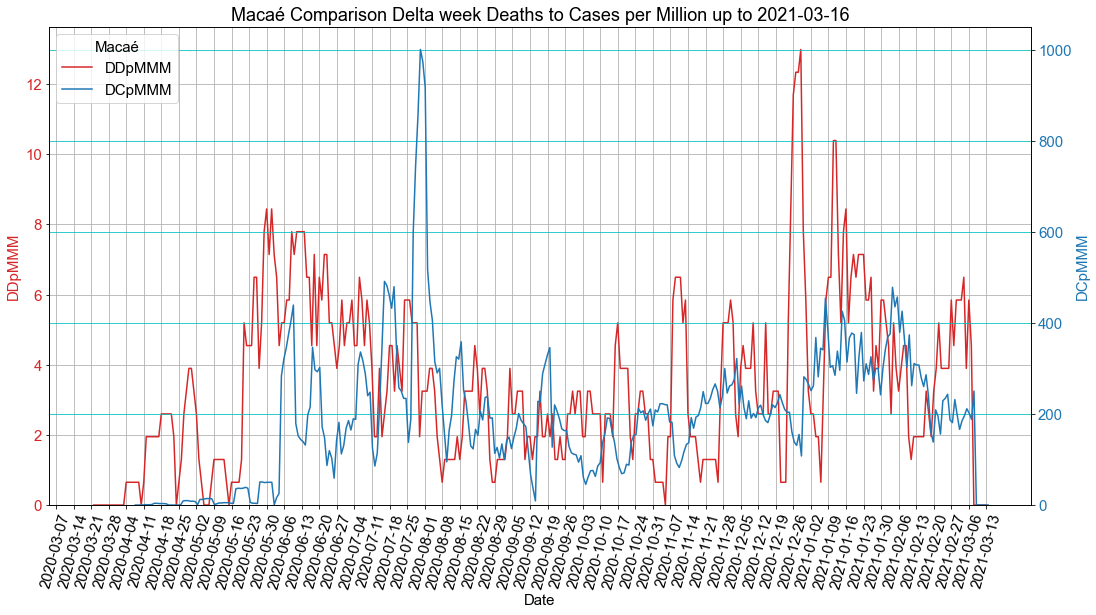

In [18]:
# aqui, separamos os dados de alguma citade e fazemos o gráfico Deaths x Cases
fig, ax1 = plty.subplots()

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

color = 'tab:red'
ax1.set_title(CityCOVIDBR+' Comparison Delta week Deaths to Cases per Million up to '+COVIDBR.data.max())
ax1.set_xlabel('Date')
ax1.set_ylabel('DDpMMM', color=color)
l1,=ax1.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpMMM,label = "DDpMMM", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=75)
ax1.set_ylim(bottom=0)
ax1.grid()

ax2 = ax1.twinx() # faz o eixo x do ax1 também do ax2

color = 'tab:blue'
ax2.set_ylabel('DCpMMM', color=color)  # we already handled the x-label with ax1
l2,=ax2.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DCpMMM,label = "DCpMMM", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
ax2.set_ylim(bottom=0)
ax2.grid(color='c')

plty.legend([l1,l2],['DDpMMM','DCpMMM'],title=CityCOVIDBR,loc='upper left')

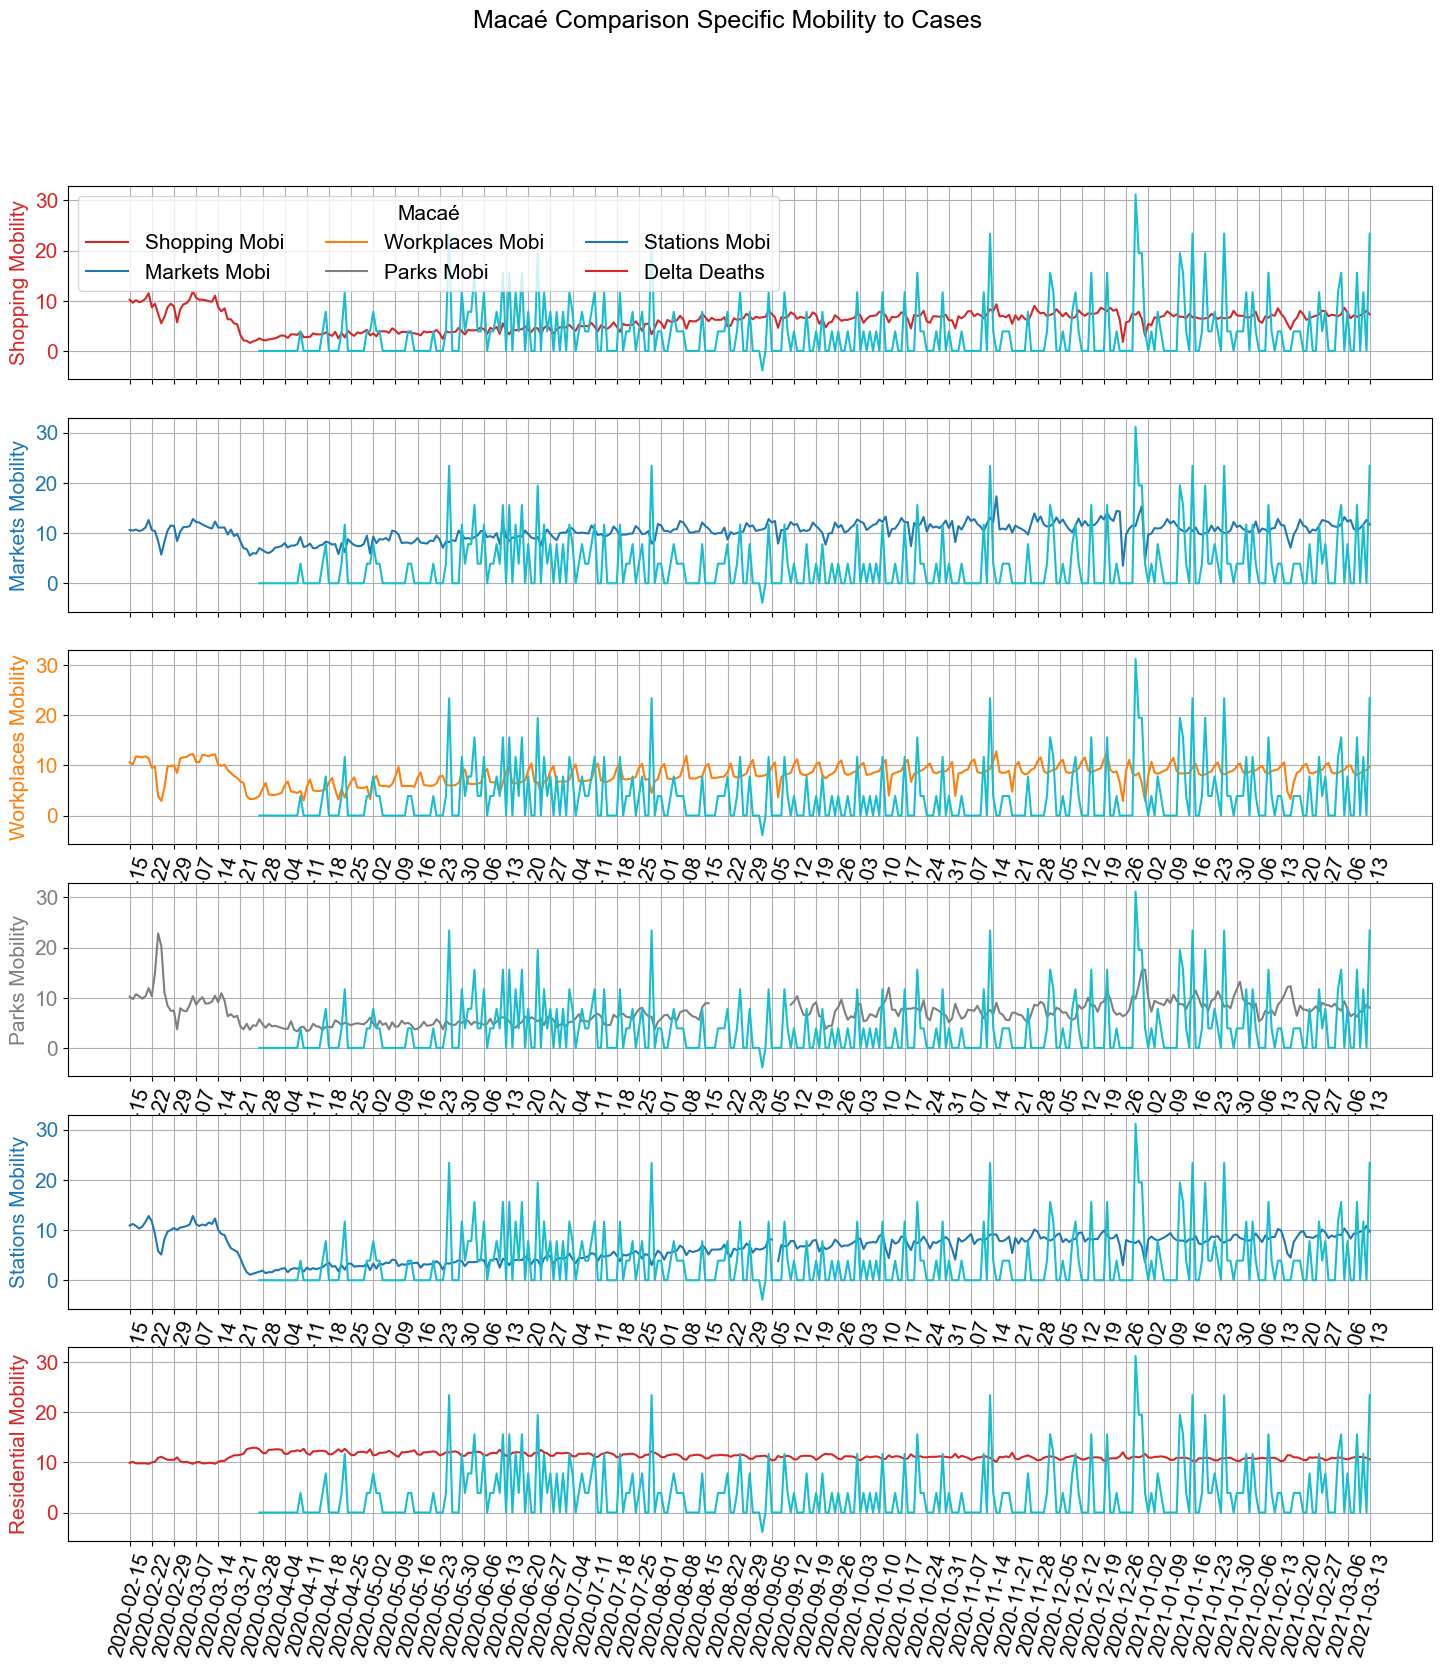

In [19]:
# aqui, separamos os dados de "City" e fazemos o gráfico
# ['ShoppMobInx','MktsMobIndx','WrkpMobIndx','DDpM','DCpM']

plt.style.use('default')
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["text.color"] = 'black' # tamanho da fonte do gráfico

plt.rcParams["figure.figsize"] = [16*1.1,16*1.1] # tamanho do gráfico em "cm"
plt.rcParams['figure.facecolor'] = 'white' # tamanho do gráfico em "cm"
plt.rcParams['axes.facecolor'] = 'white' # tamanho do gráfico em "cm"

fig, axs = plty.subplots(6)
fig.suptitle(CityCOVIDBR+' Comparison Specific Mobility to Cases')

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

# Grafico 1 --> Shopping
color = 'tab:red'
color2 = 'tab:cyan'
#axs[0].set_xlabel('Date')
axs[0].set_ylabel('Shopping Mobility', color=color)
l0,=axs[0].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Shopping*10,label = "Shopping Mobility", color=color)
l00,=axs[0].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DCpM", color=color2)
axs[0].tick_params(axis='y', labelcolor=color)
axs[0].tick_params(axis='x', labelrotation=75)
axs[0].set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs[0].set_xticklabels([])
axs[0].grid()

# Grafico 2 -- Markets
color = 'tab:blue'
axs[1].set_ylabel('Markets Mobility', color=color)
l1,=axs[1].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Markets*10,label = 'Markets Mobility', color=color)
l00,=axs[1].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DCpM", color=color2)
axs[1].tick_params(axis='y', labelcolor=color)
axs[1].tick_params(axis='x', labelrotation=75)
axs[1].set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs[1].set_xticklabels([])
axs[1].grid()#color='c')

# Grafico 3 -- Workplaces
color = 'tab:orange'
axs[2].set_ylabel('Workplaces Mobility', color=color)
l2,=axs[2].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Workplaces*10,label = 'Workplaces Mobility', color=color)
l00,=axs[2].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DCpM", color=color2)
axs[2].tick_params(axis='y', labelcolor=color)
axs[2].tick_params(axis='x', labelrotation=75)
axs[2].set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs[2].grid()#color='c')

# Grafico 4 -- Parks
color = 'tab:gray'
axs[3].set_ylabel('Parks Mobility', color=color)
l3,=axs[3].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Parks*10,label = 'Parks Mobility', color=color)
l00,=axs[3].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DCpM", color=color2)
axs[3].tick_params(axis='y', labelcolor=color)
axs[3].tick_params(axis='x', labelrotation=75)
axs[3].set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs[3].grid()#color='c')

# Grafico 5 -- Stations
color = 'tab:blue'
axs[4].set_ylabel('Stations Mobility', color=color)
l4,=axs[4].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Stations*10,label = 'Stations Mobility', color=color)
l00,=axs[4].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DCpM", color=color2)
axs[4].tick_params(axis='y', labelcolor=color)
axs[4].tick_params(axis='x', labelrotation=75)
axs[4].set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs[4].grid()#color='c')

# Grafico 6 -- Residential
color = 'tab:red'
axs[5].set_ylabel('Residential Mobility', color=color)
l5,=axs[5].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Residential*10,label = 'Residential Mobility', color=color)
l00,=axs[5].plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DCpM", color=color2)
axs[5].tick_params(axis='y', labelcolor=color)
axs[5].tick_params(axis='x', labelrotation=75)
axs[5].set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs[5].grid()#color='c')

#MobilityCOVID_City_MobInx_join.columns = ['Shopping','Markets','Workplaces','Parks','Stations','Residential','DDpM','DCpM']

axs[0].legend([l0,l1,l2,l3,l4,l5,l00],['Shopping Mobi','Markets Mobi','Workplaces Mobi','Parks Mobi','Stations Mobi','Delta Deaths'],title=CityCOVIDBR,loc='upper left',ncol=3)

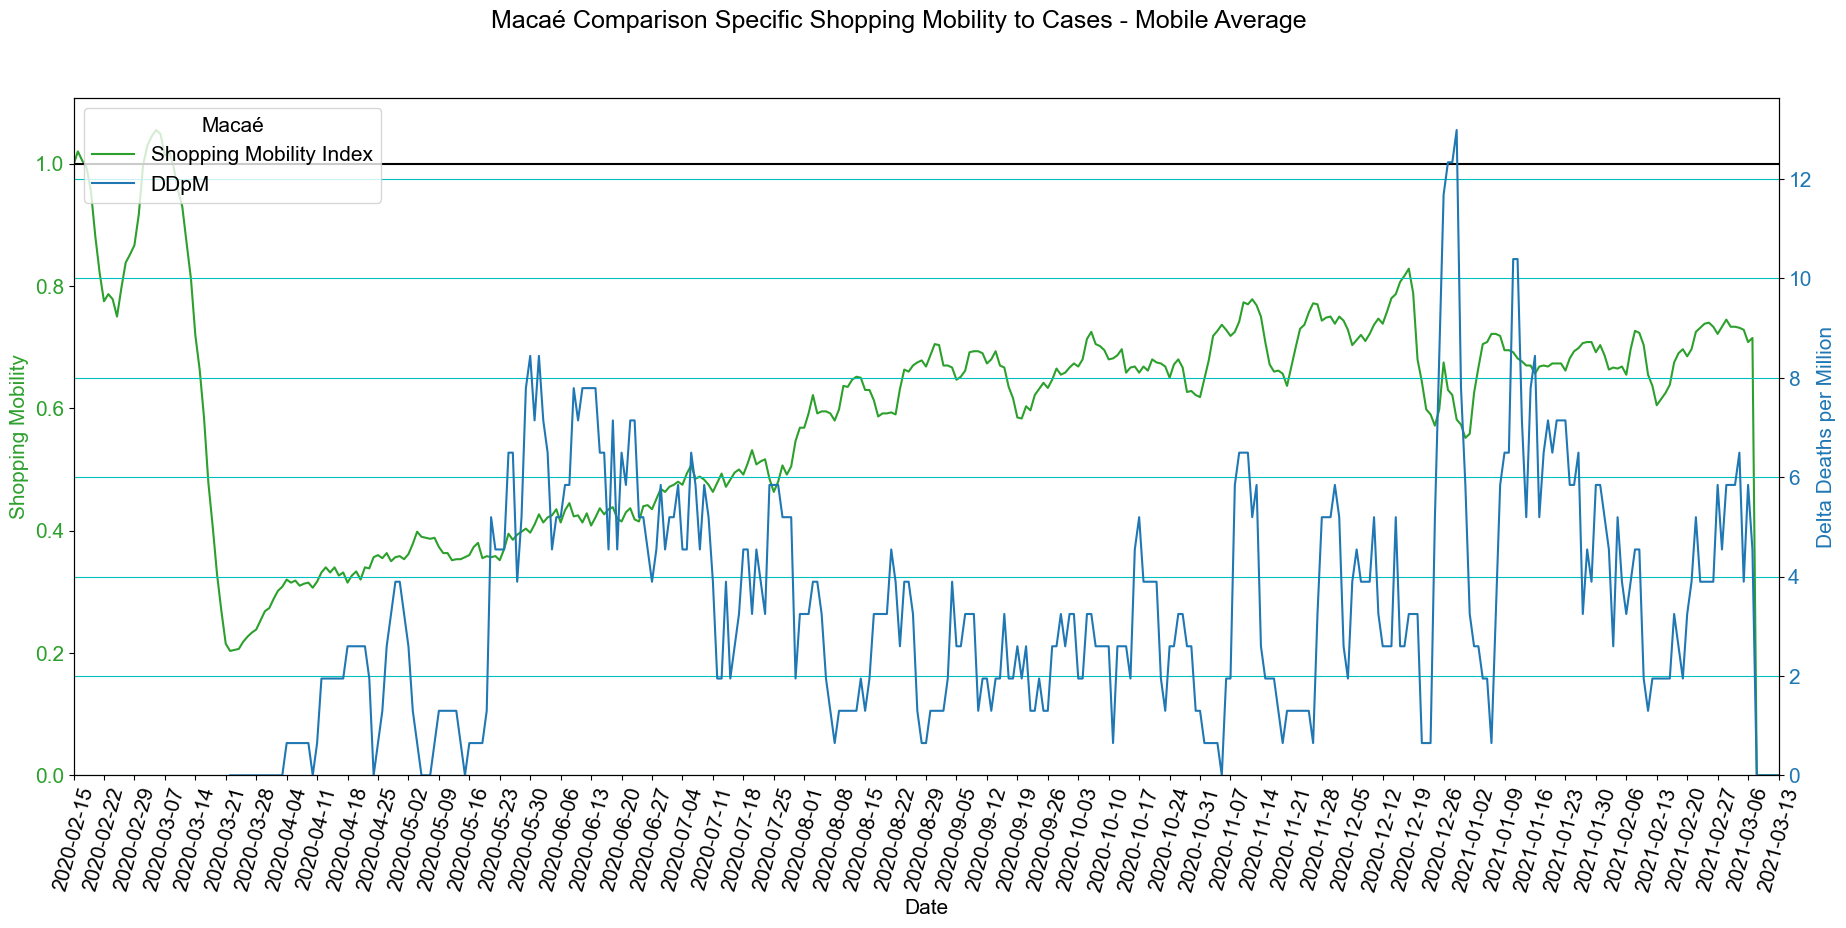

In [20]:
# aqui, separamos os dados de "City" e fazemos o gráfico
# ['ShoppMobInx','MktsMobIndx','WrkpMobIndx','DDpM','DCpM']

plt.style.use('default')
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["text.color"] = 'black' # tamanho da fonte do gráfico

plt.rcParams["figure.figsize"] = [20*1.1,8*1.1] # tamanho do gráfico em "cm"
plt.rcParams['figure.facecolor'] = 'white' # tamanho do gráfico em "cm"
plt.rcParams['axes.facecolor'] = 'white' # tamanho do gráfico em "cm"
riscoH = [MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max()]
fig, axs = plty.subplots()
fig.suptitle(CityCOVIDBR+' Comparison Specific Shopping Mobility to DDpM - Mobile Average')

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

# Grafico 1 --> Shopping
color = 'tab:green'
axs.set_xlabel('Date')
axs.set_ylabel('Shopping Mobility', color=color)
l0,=axs.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.ShoppingMM,label = "Shopping Mobility", color=color)
axs.plot(riscoH,[1,1],color='black')
axs.tick_params(axis='y', labelcolor=color)
axs.tick_params(axis='x', labelrotation=75)
axs.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs.set_xticklabels([])
y=0.00
#axs.grid()
axs.set_ylim(0)
ax2 = axs.twinx() # faz o eixo x do ax1 também do ax2

color = 'tab:blue'
ax2.set_ylabel('Delta Deaths per Million', color=color)  # we already handled the x-label with ax1
l2,=ax2.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpMMM,label = "DDpM", color='tab:blue')#,ls='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
ax2.set_ylim(0)
ax2.set_xlim(MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max())
ax2.grid(color='c')

plty.legend([l0,l2],['Shopping Mobility Index','DDpM'],title=CityCOVIDBR,loc='upper left')

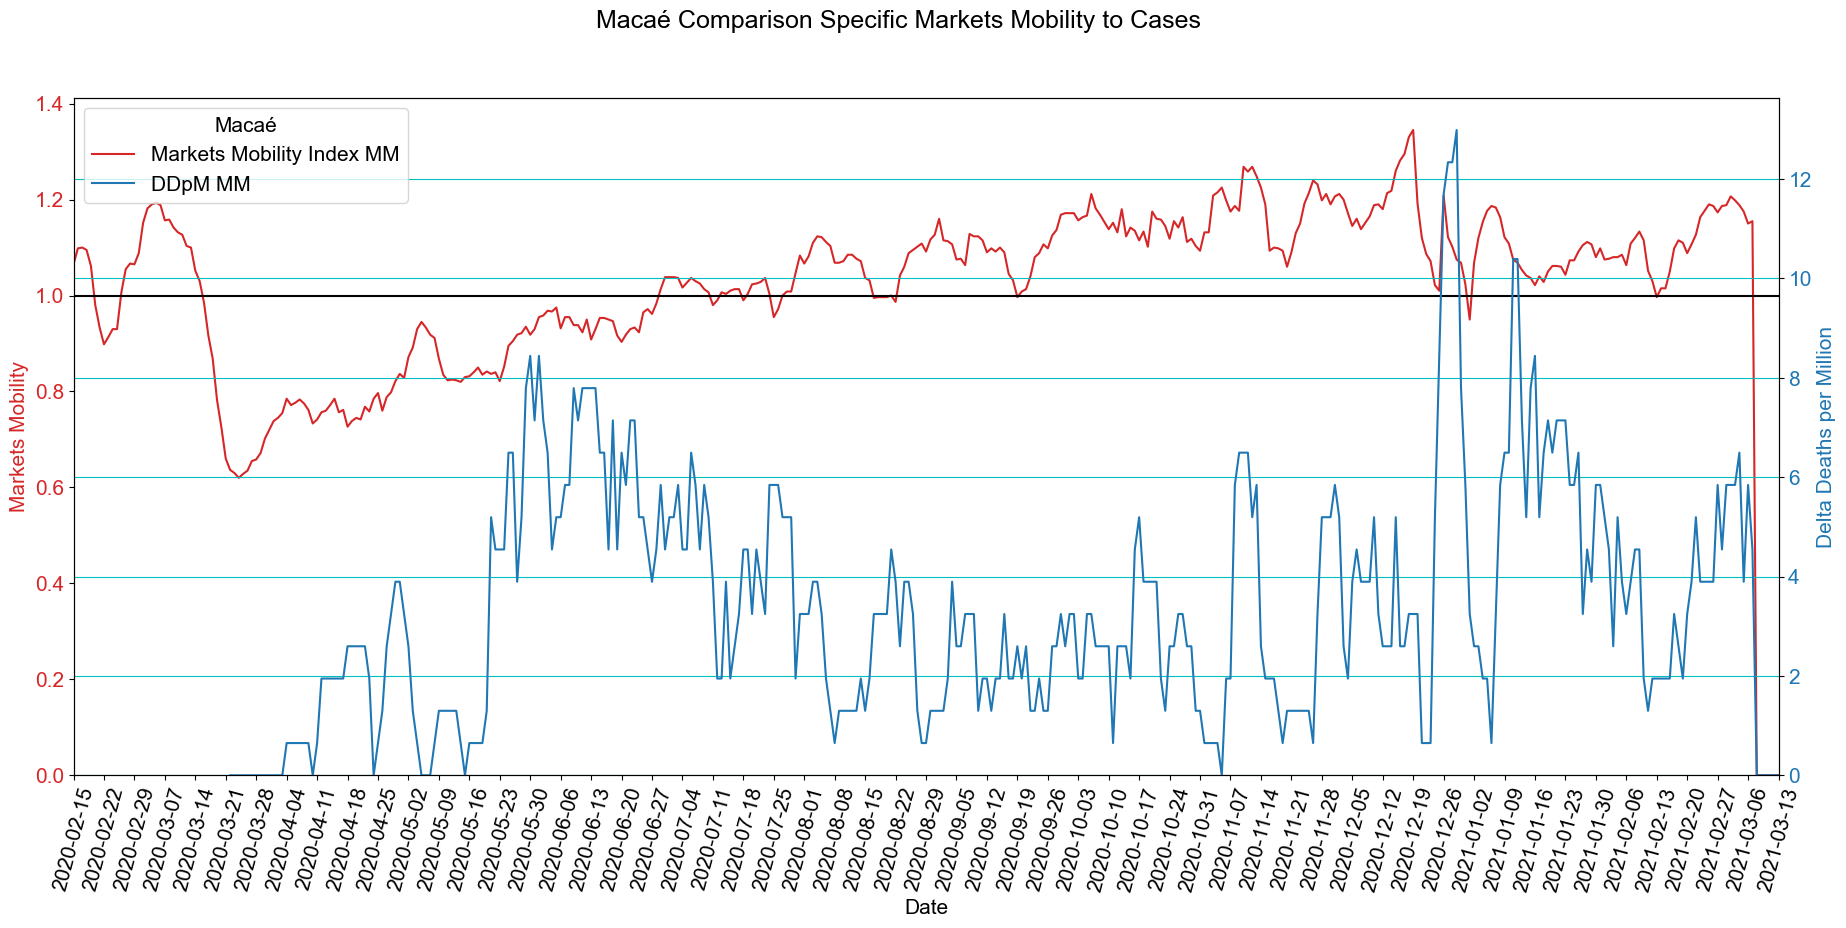

In [21]:
# aqui, separamos os dados de "City" e fazemos o gráfico
# ['ShoppMobInx','MktsMobIndx','WrkpMobIndx','DDpM','DCpM']

plt.style.use('default')
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["text.color"] = 'black' # tamanho da fonte do gráfico

plt.rcParams["figure.figsize"] = [20*1.1,8*1.1] # tamanho do gráfico em "cm"
plt.rcParams['figure.facecolor'] = 'white' # tamanho do gráfico em "cm"
plt.rcParams['axes.facecolor'] = 'white' # tamanho do gráfico em "cm"
riscoH = [MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max()]
fig, axs = plty.subplots()
fig.suptitle(CityCOVIDBR+' Comparison Specific Markets Mobility to DDpM')

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

# Grafico 1 --> Markets
color = 'tab:red'
axs.set_xlabel('Date')
axs.set_ylabel('Markets Mobility', color=color)
l0,=axs.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.MarketsMM,label = "Markets Mobility", color=color)
axs.plot(riscoH,[1,1],color='black')
axs.tick_params(axis='y', labelcolor=color)
axs.tick_params(axis='x', labelrotation=75)
axs.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs.set_xticklabels([])
y=0.00
#axs.grid()
axs.set_ylim(0)
ax2 = axs.twinx() # faz o eixo x do ax1 também do ax2

color = 'tab:blue'
ax2.set_ylabel('Delta Deaths per Million', color=color)  # we already handled the x-label with ax1
l2,=ax2.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpMMM,label = "DDpM", color='tab:blue')#,ls='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
ax2.set_ylim(0)
ax2.set_xlim(MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max())
ax2.grid(color='c')

plty.legend([l0,l2],['Markets Mobility Index MM','DDpM MM'],title=CityCOVIDBR,loc='upper left')

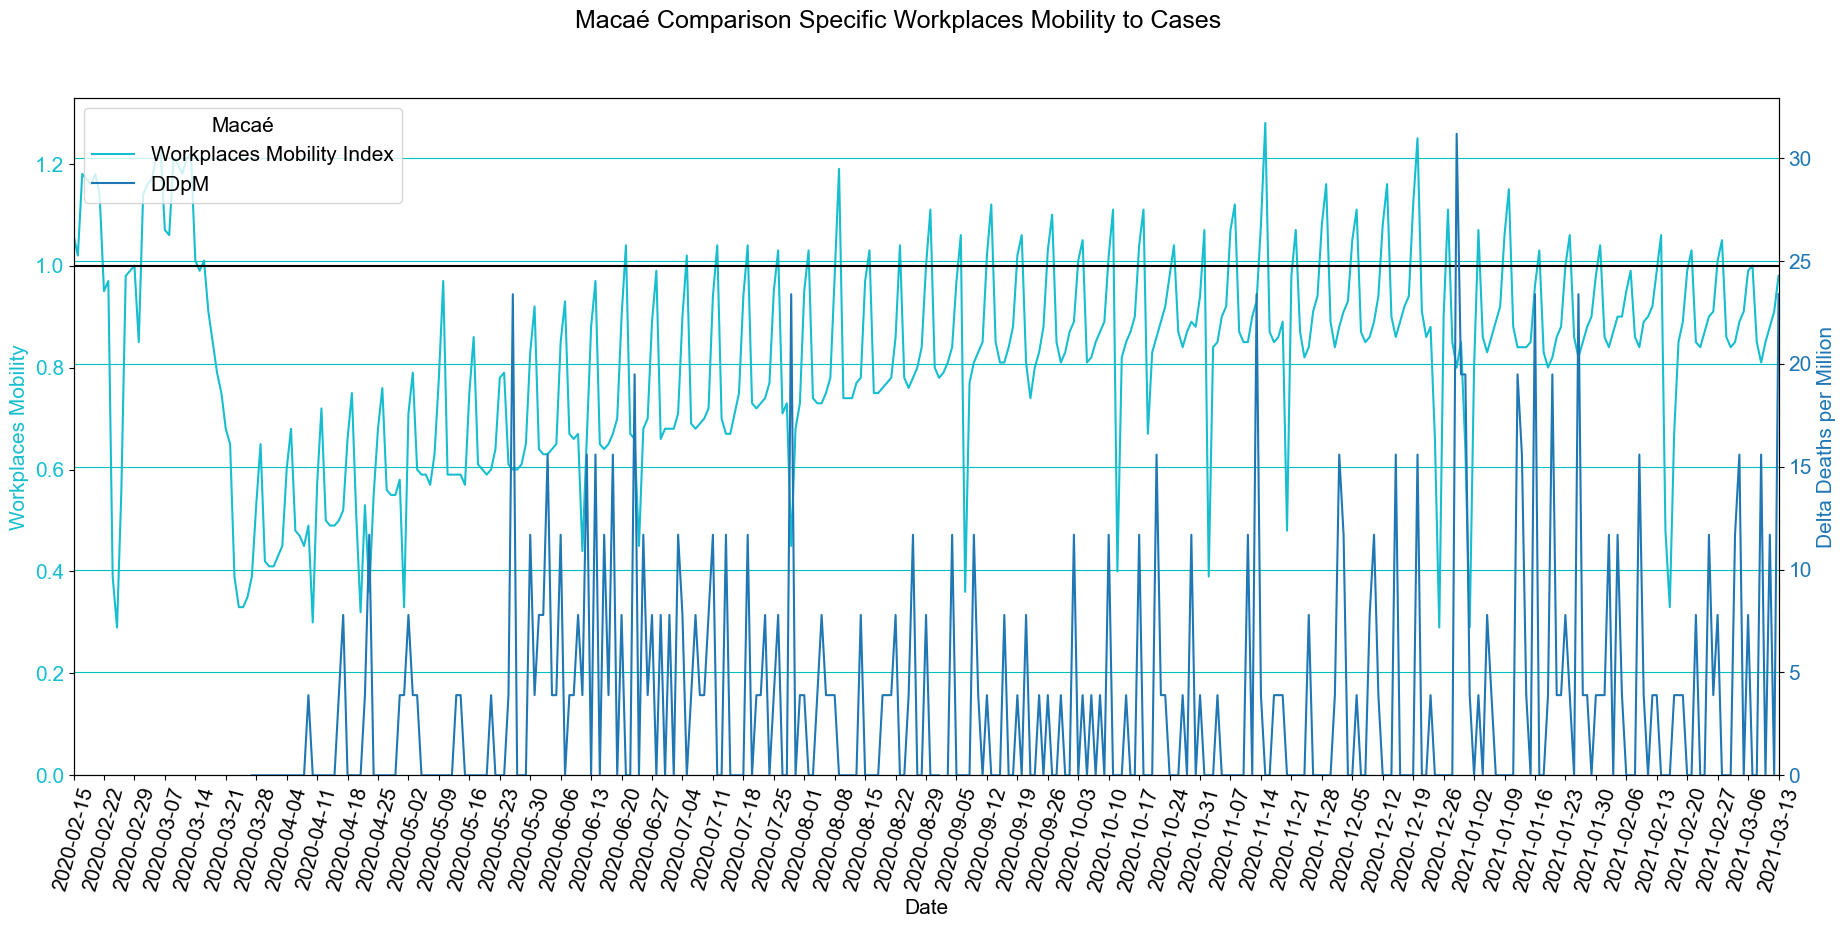

In [22]:
# aqui, separamos os dados de "City" e fazemos o gráfico
# ['ShoppMobInx','MktsMobIndx','WrkpMobIndx','DDpM','DCpM']

plt.style.use('default')
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["text.color"] = 'black' # tamanho da fonte do gráfico

plt.rcParams["figure.figsize"] = [20*1.1,8*1.1] # tamanho do gráfico em "cm"
plt.rcParams['figure.facecolor'] = 'white' # tamanho do gráfico em "cm"
plt.rcParams['axes.facecolor'] = 'white' # tamanho do gráfico em "cm"
riscoH = [MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max()]
fig, axs = plty.subplots()
fig.suptitle(CityCOVIDBR+' Comparison Specific Workplaces Mobility to Cases')

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

# Grafico 1 --> Workplaces
color = 'tab:cyan'
axs.set_xlabel('Date')
axs.set_ylabel('Workplaces Mobility', color=color)
l0,=axs.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Workplaces,label = "Workplaces Mobility", color=color)
axs.plot(riscoH,[1,1],color='black')
axs.tick_params(axis='y', labelcolor=color)
axs.tick_params(axis='x', labelrotation=75)
axs.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs.set_xticklabels([])
y=0.00
#axs.grid()
axs.set_ylim(0)
ax2 = axs.twinx() # faz o eixo x do ax1 também do ax2

color = 'tab:blue'
ax2.set_ylabel('Delta Deaths per Million', color=color)  # we already handled the x-label with ax1
l2,=ax2.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DDpM", color='tab:blue')#,ls='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
ax2.set_ylim(0)
ax2.set_xlim(MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max())
ax2.grid(color='c')

plty.legend([l0,l2],['Workplaces Mobility Index','DDpM'],title=CityCOVIDBR,loc='upper left')

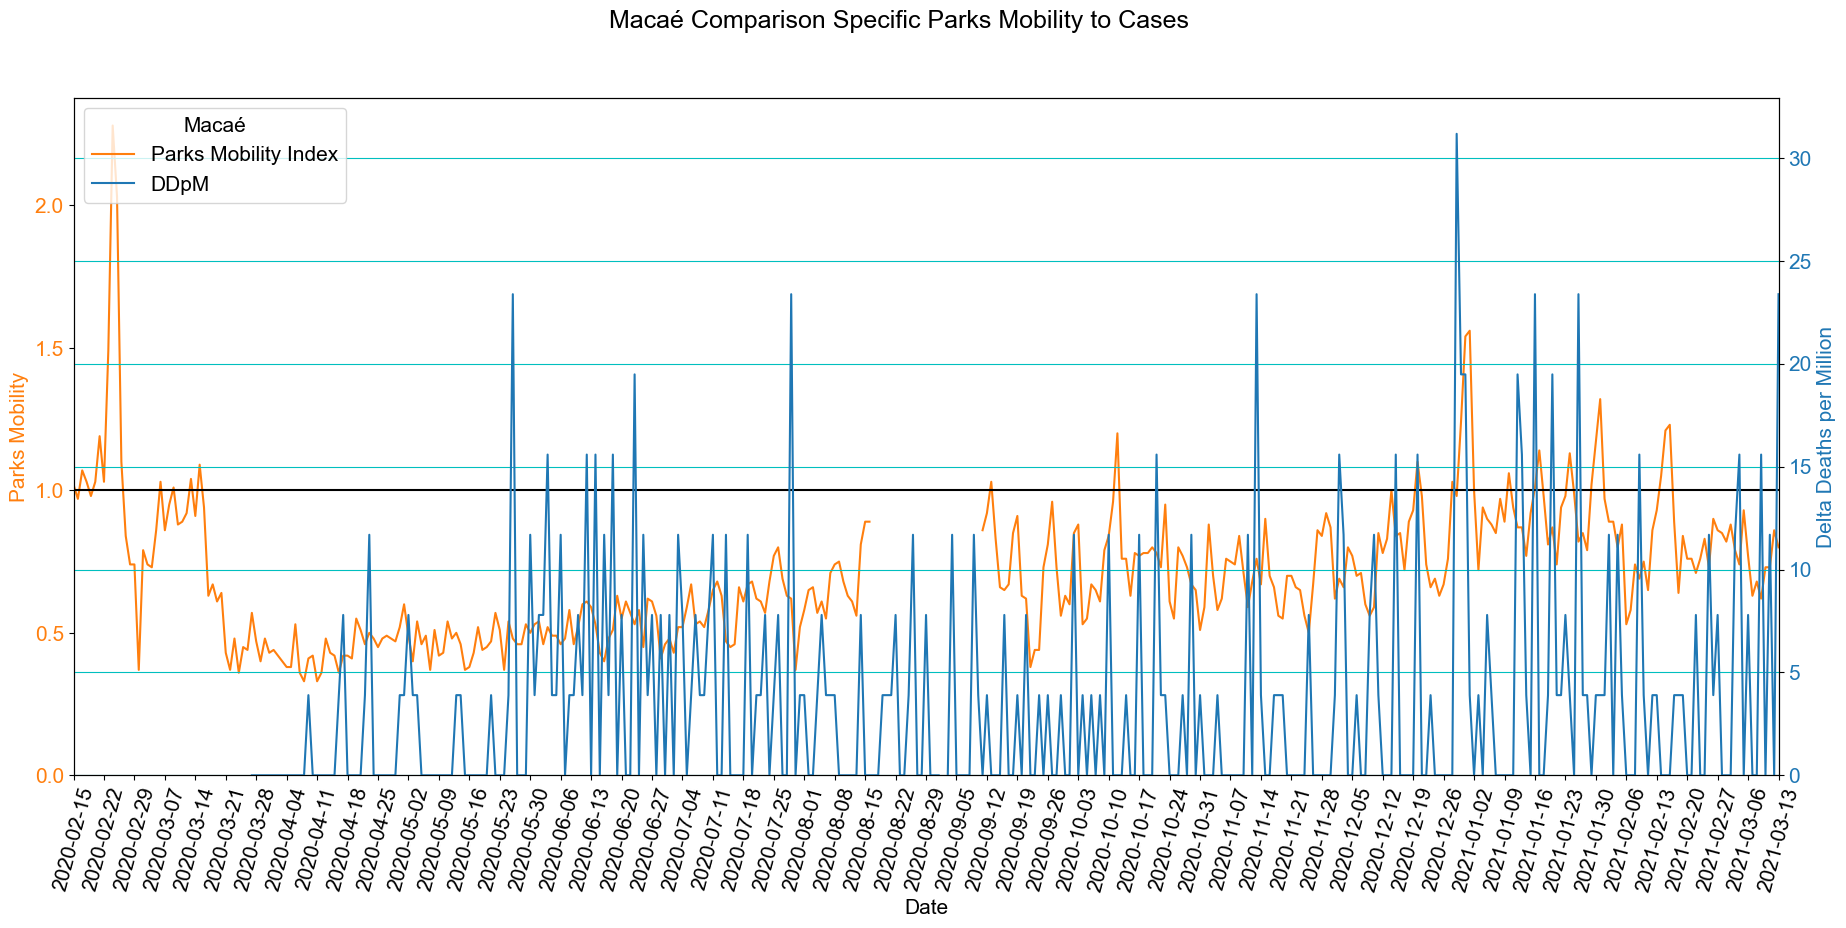

In [23]:
# aqui, separamos os dados de "City" e fazemos o gráfico
# ['ShoppMobInx','MktsMobIndx','WrkpMobIndx','DDpM','DCpM']

plt.style.use('default')
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["text.color"] = 'black' # tamanho da fonte do gráfico

plt.rcParams["figure.figsize"] = [20*1.1,8*1.1] # tamanho do gráfico em "cm"
plt.rcParams['figure.facecolor'] = 'white' # tamanho do gráfico em "cm"
plt.rcParams['axes.facecolor'] = 'white' # tamanho do gráfico em "cm"

fig, axs = plty.subplots()
fig.suptitle(CityCOVIDBR+' Comparison Specific Parks Mobility to Cases')

riscoH = [MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max()]

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

# Grafico 1 --> Parks
color = 'tab:orange'
axs.set_xlabel('Date')
axs.set_ylabel('Parks Mobility', color=color)
l0,=axs.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Parks,label = "Parks Mobility", color=color)
axs.plot(riscoH,[1,1],color='black')
axs.tick_params(axis='y', labelcolor=color)
axs.tick_params(axis='x', labelrotation=75)
axs.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs.set_xticklabels([])
y=0.00
#axs.grid()
axs.set_ylim(0)
ax2 = axs.twinx() # faz o eixo x do ax1 também do ax2

color = 'tab:blue'
ax2.set_ylabel('Delta Deaths per Million', color=color)  # we already handled the x-label with ax1
l2,=ax2.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DDpM", color='tab:blue')#,ls='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
ax2.set_ylim(0)
ax2.set_xlim(MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max())
ax2.grid(color='c')

plty.legend([l0,l2],['Parks Mobility Index','DDpM'],title=CityCOVIDBR,loc='upper left')

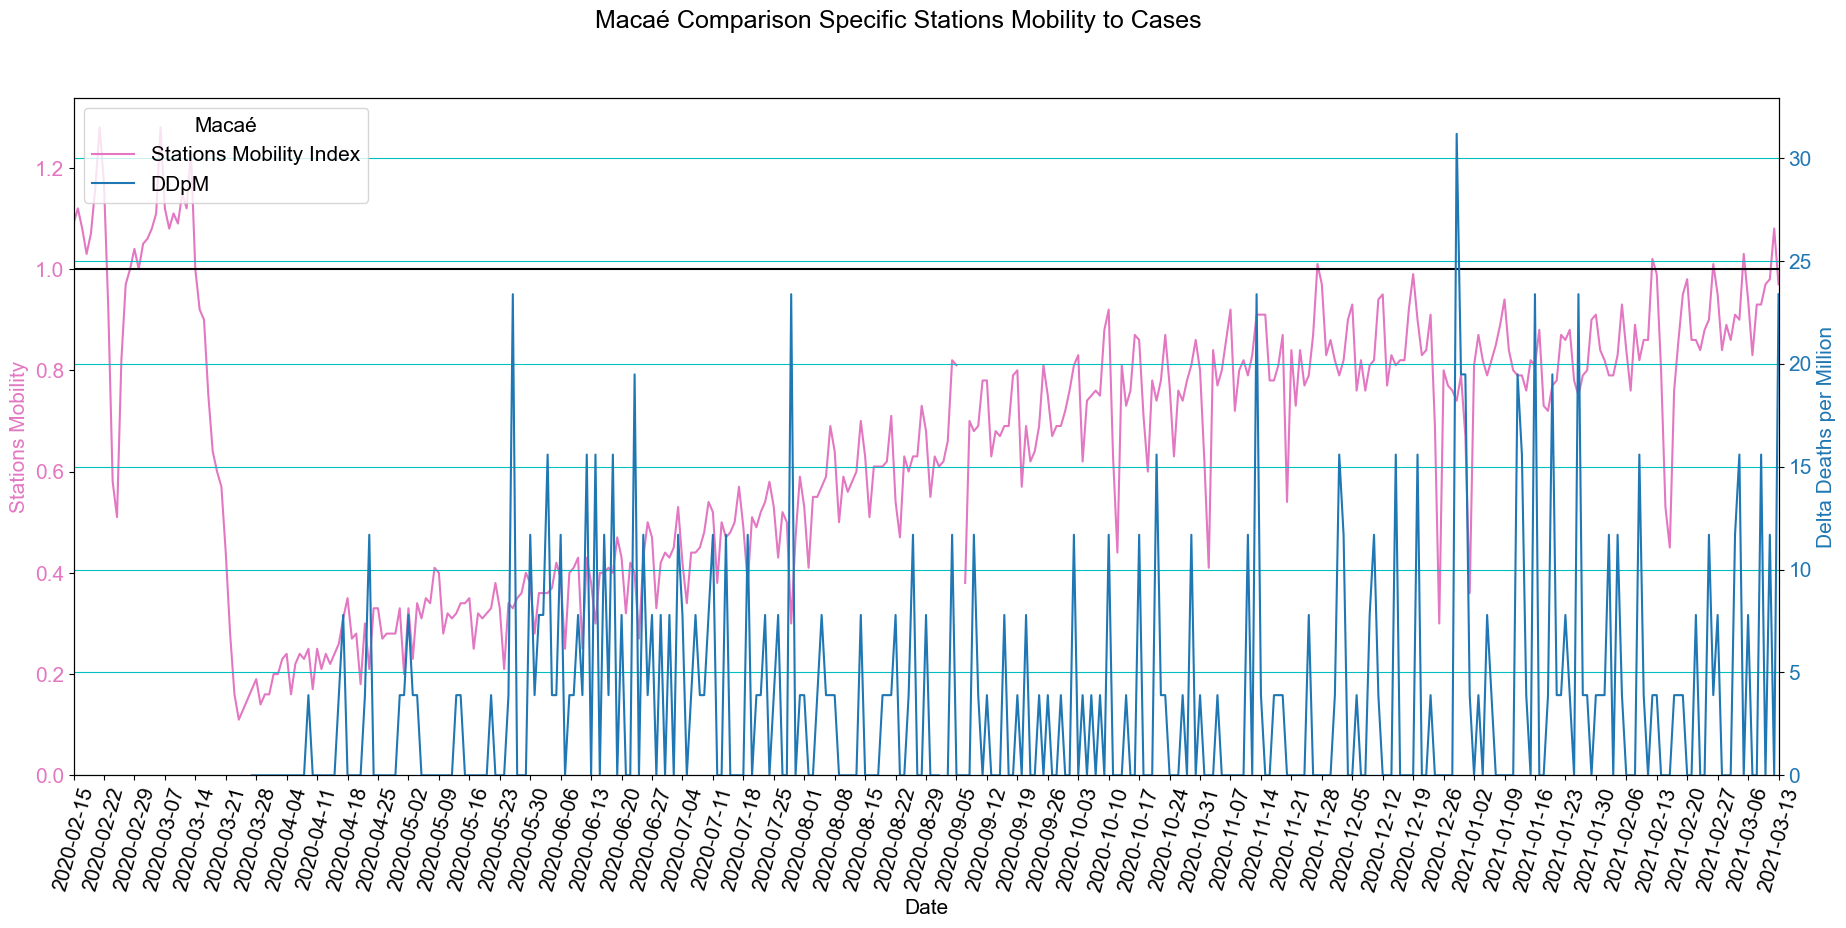

In [24]:
# aqui, separamos os dados de "City" e fazemos o gráfico
# ['ShoppMobInx','MktsMobIndx','WrkpMobIndx','DDpM','DCpM']

plt.style.use('default')
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["text.color"] = 'black' # tamanho da fonte do gráfico

plt.rcParams["figure.figsize"] = [20*1.1,8*1.1] # tamanho do gráfico em "cm"
plt.rcParams['figure.facecolor'] = 'white' # tamanho do gráfico em "cm"
plt.rcParams['axes.facecolor'] = 'white' # tamanho do gráfico em "cm"

riscoH = [MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max()]

fig, axs = plty.subplots()
fig.suptitle(CityCOVIDBR+' Comparison Specific Stations Mobility to Cases')

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

# Grafico 1 --> Stations
color = 'tab:pink'
axs.set_xlabel('Date')
axs.set_ylabel('Stations Mobility', color=color)
l0,=axs.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.Stations,label = "Stations Mobility", color=color)
axs.plot(riscoH,[1,1],color='black')
axs.tick_params(axis='y', labelcolor=color)
axs.tick_params(axis='x', labelrotation=75)
axs.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs.set_xticklabels([])
y=0.00
#axs.grid()
axs.set_ylim(0)
ax2 = axs.twinx() # faz o eixo x do ax1 também do ax2

color = 'tab:blue'
ax2.set_ylabel('Delta Deaths per Million', color=color)  # we already handled the x-label with ax1
l2,=ax2.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpM,label = "DDpM", color='tab:blue')#,ls='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
ax2.set_ylim(0)
ax2.set_xlim(MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max())
ax2.grid(color='c')

plty.legend([l0,l2],['Stations Mobility Index','DDpM'],title=CityCOVIDBR,loc='upper left')

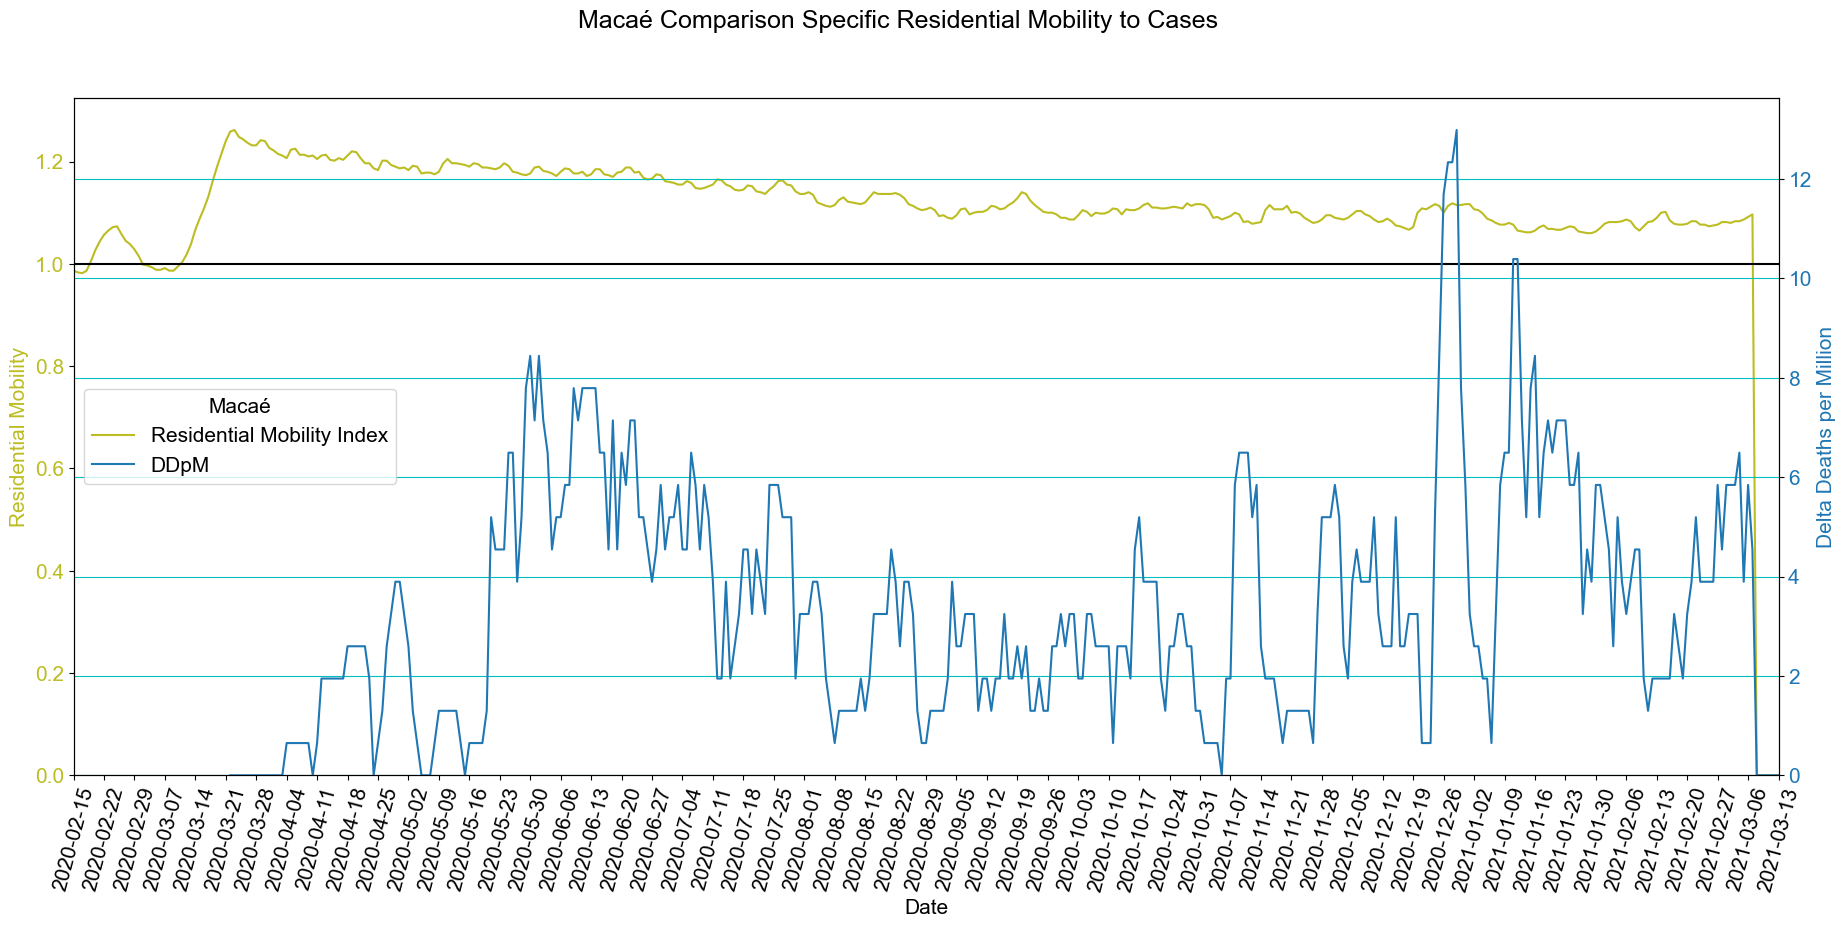

In [25]:
# aqui, separamos os dados de "City" e fazemos o gráfico
# ['ShoppMobInx','MktsMobIndx','WrkpMobIndx','DDpM','DCpM']

plt.style.use('default')
plt.rcParams["font.family"] = "Arial" # fonte do gráfico
plt.rcParams["font.size"] = 15 # tamanho da fonte do gráfico
plt.rcParams["text.color"] = 'black' # tamanho da fonte do gráfico

plt.rcParams["figure.figsize"] = [20*1.1,8*1.1] # tamanho do gráfico em "cm"
plt.rcParams['figure.facecolor'] = 'white' # tamanho do gráfico em "cm"
plt.rcParams['axes.facecolor'] = 'white' # tamanho do gráfico em "cm"

riscoH = [MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max()]

fig, axs = plty.subplots()
fig.suptitle(CityCOVIDBR+' Comparison Specific Residential Mobility to Cases')

x_ticks = np.arange(0, len(MobilityCOVID_City_MobInx_join.index), 7)

# Grafico 1 --> Residential
color = 'tab:olive'
axs.set_xlabel('Date')
axs.set_ylabel('Residential Mobility', color=color)
l0,=axs.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.ResidentialMM,label = "Residential Mobility", color=color)
axs.plot(riscoH,[1,1],color='black')
axs.tick_params(axis='y', labelcolor=color)
axs.tick_params(axis='x', labelrotation=75)
axs.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
axs.set_xticklabels([])
y=0.00
#axs.grid()
axs.set_ylim(0)
ax2 = axs.twinx() # faz o eixo x do ax1 também do ax2

color = 'tab:blue'
ax2.set_ylabel('Delta Deaths per Million', color=color)  # we already handled the x-label with ax1
l2,=ax2.plot(MobilityCOVID_City_MobInx_join.index,MobilityCOVID_City_MobInx_join.DDpMMM,label = "DDpM", color='tab:blue')#,ls='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(MobilityCOVID_City_MobInx_join.index[x_ticks])
ax2.set_ylim(0)
ax2.set_xlim(MobilityCOVID_City_MobInx_join.index.min(),MobilityCOVID_City_MobInx_join.index.max())
ax2.grid(color='c')

plty.legend([l0,l2],['Residential Mobility Index','DDpM'],title=CityCOVIDBR,loc='center left')